In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

In [2]:
# Setting style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [3]:
# Load the raw CSV
df = pd.read_csv(r"C:\Users\Lilian\Downloads\Crime_Data_from_2020_to_Present.csv")

In [5]:
df.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,1.004991e+06,1.004991e+06,1.004991e+06,1.004991e+06,1.004991e+06,1.004991e+06,1.004991e+06,1.004975e+06,327247.000000,1.004980e+06,69160.000000,2314.000000,64.00000,1.004991e+06,1.004991e+06
mean,2.202215e+08,1.339900e+03,1.069174e+01,1.115633e+03,1.400348e+00,5.001568e+02,2.891706e+01,3.056201e+02,363.955300,4.999174e+02,958.101258,984.015990,991.21875,3.399821e+01,-1.180909e+02
std,1.319718e+07,6.510613e+02,6.110255e+00,6.111605e+02,4.899691e-01,2.052731e+02,2.199272e+01,2.193021e+02,123.734528,2.050736e+02,110.354348,52.350982,27.06985,1.610713e+00,5.582386e+00
min,8.170000e+02,1.000000e+00,1.000000e+00,1.010000e+02,1.000000e+00,1.100000e+02,-4.000000e+00,1.010000e+02,101.000000,1.100000e+02,210.000000,310.000000,821.00000,0.000000e+00,-1.186676e+02
25%,2.106169e+08,9.000000e+02,5.000000e+00,5.870000e+02,1.000000e+00,3.310000e+02,0.000000e+00,1.010000e+02,311.000000,3.310000e+02,998.000000,998.000000,998.00000,3.401470e+01,-1.184305e+02
50%,2.209159e+08,1.420000e+03,1.100000e+01,1.139000e+03,1.000000e+00,4.420000e+02,3.000000e+01,2.030000e+02,400.000000,4.420000e+02,998.000000,998.000000,998.00000,3.405890e+01,-1.183225e+02
75%,2.311103e+08,1.900000e+03,1.600000e+01,1.613000e+03,2.000000e+00,6.260000e+02,4.400000e+01,5.010000e+02,400.000000,6.260000e+02,998.000000,998.000000,998.00000,3.416490e+01,-1.182739e+02
max,2.521041e+08,2.359000e+03,2.100000e+01,2.199000e+03,2.000000e+00,9.560000e+02,1.200000e+02,9.760000e+02,516.000000,9.560000e+02,999.000000,999.000000,999.00000,3.433430e+01,0.000000e+00


In [6]:
df.count()

DR_NO             1004991
Date Rptd         1004991
DATE OCC          1004991
TIME OCC          1004991
AREA              1004991
AREA NAME         1004991
Rpt Dist No       1004991
Part 1-2          1004991
Crm Cd            1004991
Crm Cd Desc       1004991
Mocodes            853372
Vict Age          1004991
Vict Sex           860347
Vict Descent       860335
Premis Cd         1004975
Premis Desc       1004403
Weapon Used Cd     327247
Weapon Desc        327247
Status            1004990
Status Desc       1004991
Crm Cd 1          1004980
Crm Cd 2            69160
Crm Cd 3             2314
Crm Cd 4               64
LOCATION          1004991
Cross Street       154236
LAT               1004991
LON               1004991
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004991 entries, 0 to 1004990
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   DR_NO           1004991 non-null  int64  
 1   Date Rptd       1004991 non-null  object 
 2   DATE OCC        1004991 non-null  object 
 3   TIME OCC        1004991 non-null  int64  
 4   AREA            1004991 non-null  int64  
 5   AREA NAME       1004991 non-null  object 
 6   Rpt Dist No     1004991 non-null  int64  
 7   Part 1-2        1004991 non-null  int64  
 8   Crm Cd          1004991 non-null  int64  
 9   Crm Cd Desc     1004991 non-null  object 
 10  Mocodes         853372 non-null   object 
 11  Vict Age        1004991 non-null  int64  
 12  Vict Sex        860347 non-null   object 
 13  Vict Descent    860335 non-null   object 
 14  Premis Cd       1004975 non-null  float64
 15  Premis Desc     1004403 non-null  object 
 16  Weapon Used Cd  327247 non-null   fl

In [10]:
# DATA CLEANING #

#Fixing Weapon Description
df['Weapon Desc'] = df['Weapon Desc'].fillna('NO WEAPON USED')
df['Weapon Used Cd'] = df['Weapon Used Cd'].fillna(0)

In [11]:
#Fixing Coordinates
df.loc[df['LAT'] == 0, 'LAT'] = np.nan
df.loc[df['LON'] == 0, 'LON'] = np.nan

In [12]:
#Fixing Invalid Victim Age
df.loc[df['Vict Age'] <= 0, 'Vict Age'] = np.nan

In [13]:
#Fixing Status
df['Status'] = df['Status'].fillna('UNK')

In [14]:
#Fixing Premise Descriptions
df['Premis Desc'] = df['Premis Desc'].fillna('UNKNOWN')
df.loc[df['Premis Cd'].isna(), 'Premis Cd'] = 0
df.loc[df['Premis Cd'] == 0, 'Premis Desc'] = 'UNKNOWN'

In [15]:
#Converting Datetime Columns and Adding Helper Columns
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], errors='coerce')
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'], errors='coerce')

# Converting TIME OCC to datetime and extract hour
df['TIME OCC'] = pd.to_datetime(df['TIME OCC'], format='%H:%M:%S', errors='coerce')
df['Hour_OCC'] = df['TIME OCC'].dt.hour

# Extracting date components
df['Year_OCC'] = df['DATE OCC'].dt.year
df['Month_OCC'] = df['DATE OCC'].dt.month_name()
df['DayOfWeek_OCC'] = df['DATE OCC'].dt.day_name()
df['Date_Only_OCC'] = df['DATE OCC'].dt.date

In [16]:
#Saving Cleaned Data to CSV
df.to_csv('LA_Crimes_Data_Cleaned.csv', index=False)

In [17]:
#Creating SUMMARY TABLES FOR TABLEAU #

# Summary 1: By Area
summary_area = df.groupby('AREA NAME').size().reset_index(name='Total_Crimes')
summary_area = summary_area.sort_values('Total_Crimes', ascending=False)
summary_area.to_csv('Crime_Summary_By_Area.csv', index=False)

In [18]:
# Summary 2: By Hour
summary_hour = df.groupby('Hour_OCC').size().reset_index(name='Total_Crimes')
summary_hour = summary_hour.sort_values('Hour_OCC')
summary_hour.to_csv('Crime_Summary_By_Hour.csv', index=False)

In [19]:
# Summary 3: By Crime Type
summary_type = df.groupby('Crm Cd Desc').size().reset_index(name='Total_Incidents')
summary_type = summary_type.sort_values('Total_Incidents', ascending=False)
summary_type.to_csv('Crime_Summary_By_Type.csv', index=False)

In [20]:
# Summary 4: By Weapon
summary_weapon = df.groupby('Weapon Desc').size().reset_index(name='Total_Uses')
summary_weapon = summary_weapon.sort_values('Total_Uses', ascending=False)
summary_weapon.to_csv('Crime_Summary_By_Weapon.csv', index=False)

In [21]:
# Summary 5: By Status
summary_status = df.groupby('Status Desc').size().reset_index(name='Total_Cases')
summary_status = summary_status.sort_values('Total_Cases', ascending=False)
summary_status.to_csv('Crime_Summary_By_Status.csv', index=False)

In [22]:
# Summary 6: By Premise
summary_premise = df.groupby('Premis Desc').size().reset_index(name='Total_Crimes')
summary_premise = summary_premise.sort_values('Total_Crimes', ascending=False)
summary_premise.to_csv('Crime_Summary_By_Premise.csv', index=False)

In [23]:
# Summary 7: By Year and Month
summary_time = df.groupby(['Year_OCC', 'Month_OCC']).size().reset_index(name='Total_Crimes')
summary_time.to_csv('Crime_Summary_By_Time.csv', index=False)

C:\Users\Lilian\AppData\Local\Temp\ipykernel_2912\2832598922.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_areas, y='AREA NAME', x='Total_Crimes', palette='Reds_r')


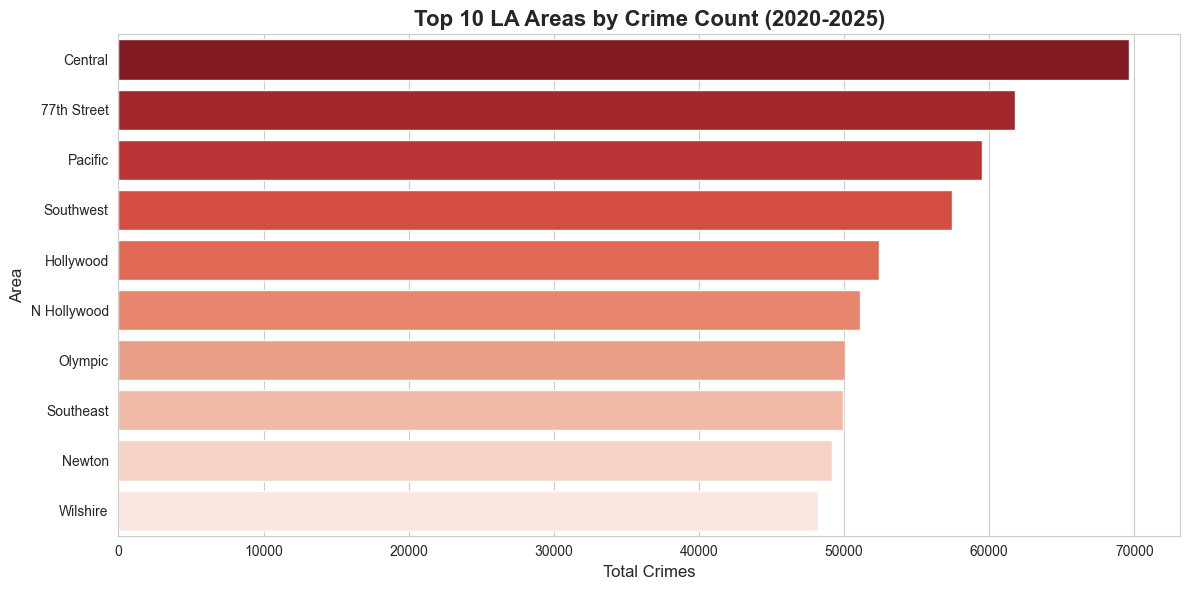

In [26]:
#VISUALIZATIONS#

# VIZ 1: Top 10 Areas with Most Crime
plt.figure(figsize=(12, 6))
top_areas = summary_area.head(10)
sns.barplot(data=top_areas, y='AREA NAME', x='Total_Crimes', palette='Reds_r')
plt.title('Top 10 LA Areas by Crime Count (2020-2025)', fontsize=16, fontweight='bold')
plt.xlabel('Total Crimes', fontsize=12)
plt.ylabel('Area', fontsize=12)
plt.tight_layout()
plt.show()

✅ Saved: 2_Crime_By_Hour.png


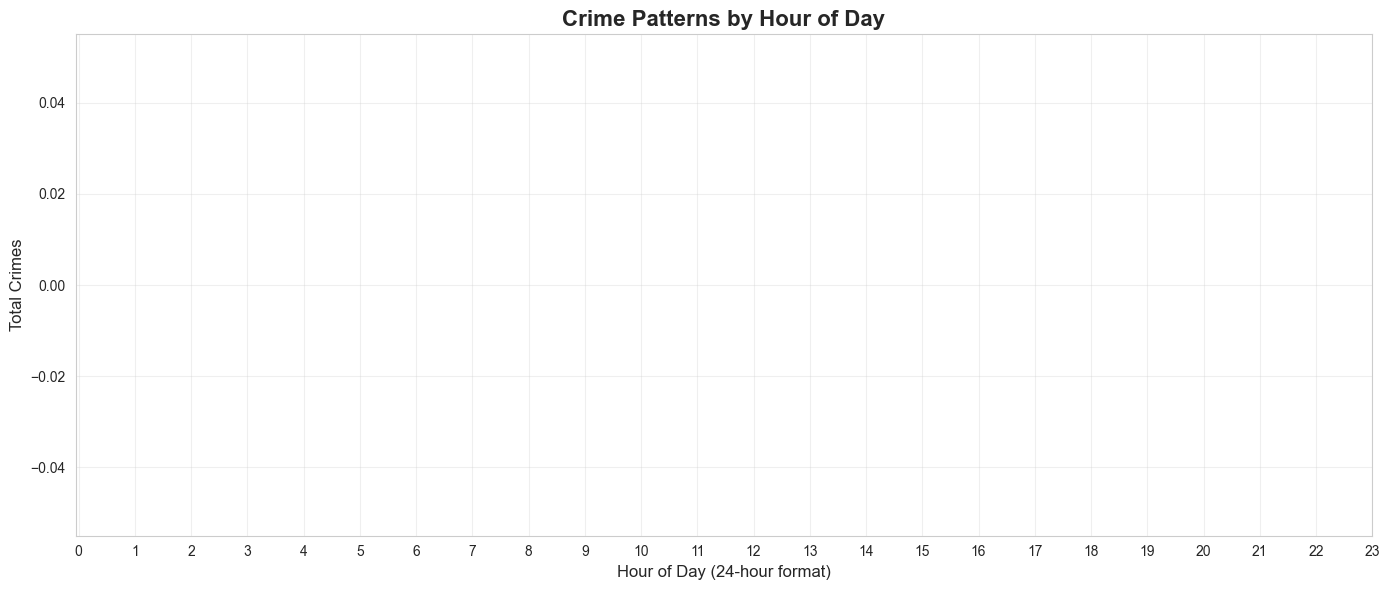

In [25]:
# VIZ 2: Crime by Hour of Day
plt.figure(figsize=(14, 6))
sns.lineplot(data=summary_hour, x='Hour_OCC', y='Total_Crimes', marker='o', linewidth=2.5, color='#e74c3c')
plt.title('Crime Patterns by Hour of Day', fontsize=16, fontweight='bold')
plt.xlabel('Hour of Day (24-hour format)', fontsize=12)
plt.ylabel('Total Crimes', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('2_Crime_By_Hour.png', dpi=300, bbox_inches='tight')
print("✅ Saved: 2_Crime_By_Hour.png")
plt.show()

C:\Users\Lilian\AppData\Local\Temp\ipykernel_2912\4167903657.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_crimes, y='Crm Cd Desc', x='Total_Incidents', palette='viridis')


✅ Saved: 3_Crime_Types.png


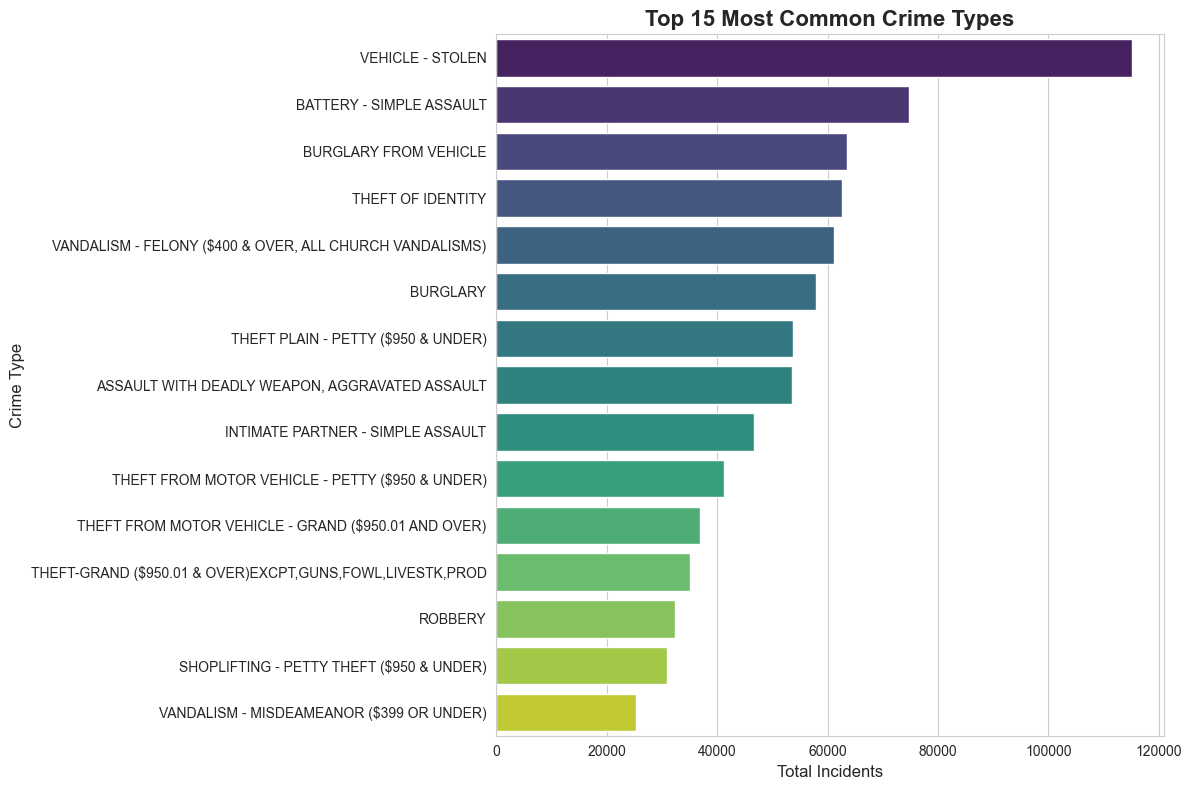

In [27]:
# VIZ 3: Top 15 Crime Types
plt.figure(figsize=(12, 8))
top_crimes = summary_type.head(15)
sns.barplot(data=top_crimes, y='Crm Cd Desc', x='Total_Incidents', palette='viridis')
plt.title('Top 15 Most Common Crime Types', fontsize=16, fontweight='bold')
plt.xlabel('Total Incidents', fontsize=12)
plt.ylabel('Crime Type', fontsize=12)
plt.tight_layout()
plt.savefig('3_Crime_Types.png', dpi=300, bbox_inches='tight')
print("✅ Saved: 3_Crime_Types.png")
plt.show()

C:\Users\Lilian\AppData\Local\Temp\ipykernel_2912\2168869471.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_weapons, y='Weapon Desc', x='Total_Uses', palette='coolwarm')


✅ Saved: 4_Weapons_Used.png


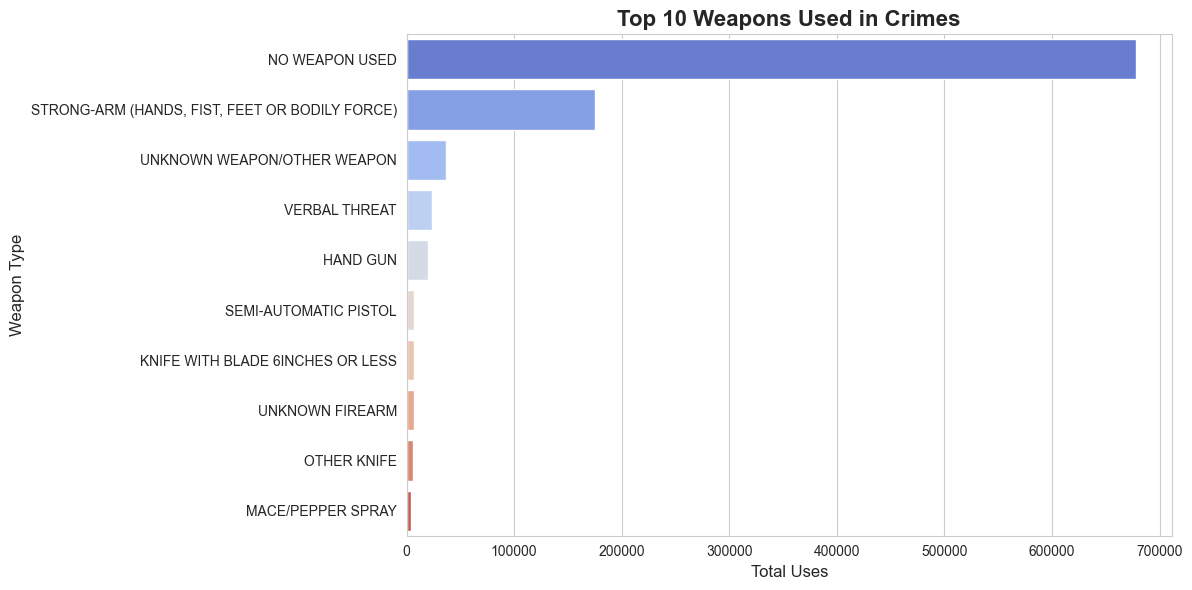

In [28]:
# VIZ 4: Top 10 Weapons Used
plt.figure(figsize=(12, 6))
top_weapons = summary_weapon.head(10)
sns.barplot(data=top_weapons, y='Weapon Desc', x='Total_Uses', palette='coolwarm')
plt.title('Top 10 Weapons Used in Crimes', fontsize=16, fontweight='bold')
plt.xlabel('Total Uses', fontsize=12)
plt.ylabel('Weapon Type', fontsize=12)
plt.tight_layout()
plt.savefig('4_Weapons_Used.png', dpi=300, bbox_inches='tight')
print("✅ Saved: 4_Weapons_Used.png")
plt.show()

✅ Saved: 5_Case_Status.png


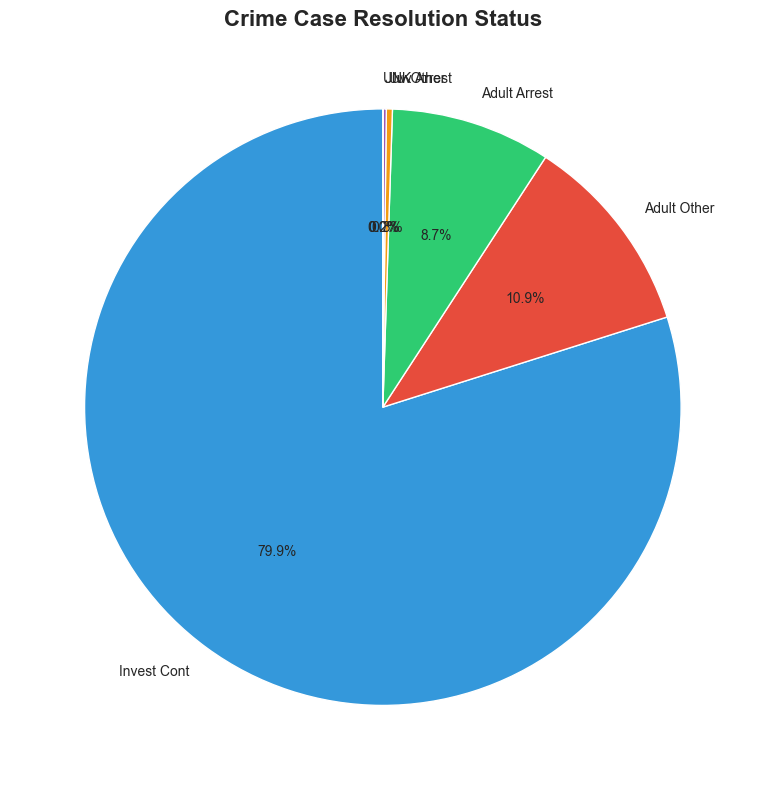

In [29]:
# VIZ 5: Case Resolution Status (Pie Chart)
plt.figure(figsize=(10, 8))
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6', '#95a5a6']
plt.pie(summary_status['Total_Cases'], labels=summary_status['Status Desc'], 
        autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Crime Case Resolution Status', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('5_Case_Status.png', dpi=300, bbox_inches='tight')
print("✅ Saved: 5_Case_Status.png")
plt.show()

C:\Users\Lilian\AppData\Local\Temp\ipykernel_2912\2343397895.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_premises, y='Premis Desc', x='Total_Crimes', palette='mako')


✅ Saved: 6_Crime_Locations.png


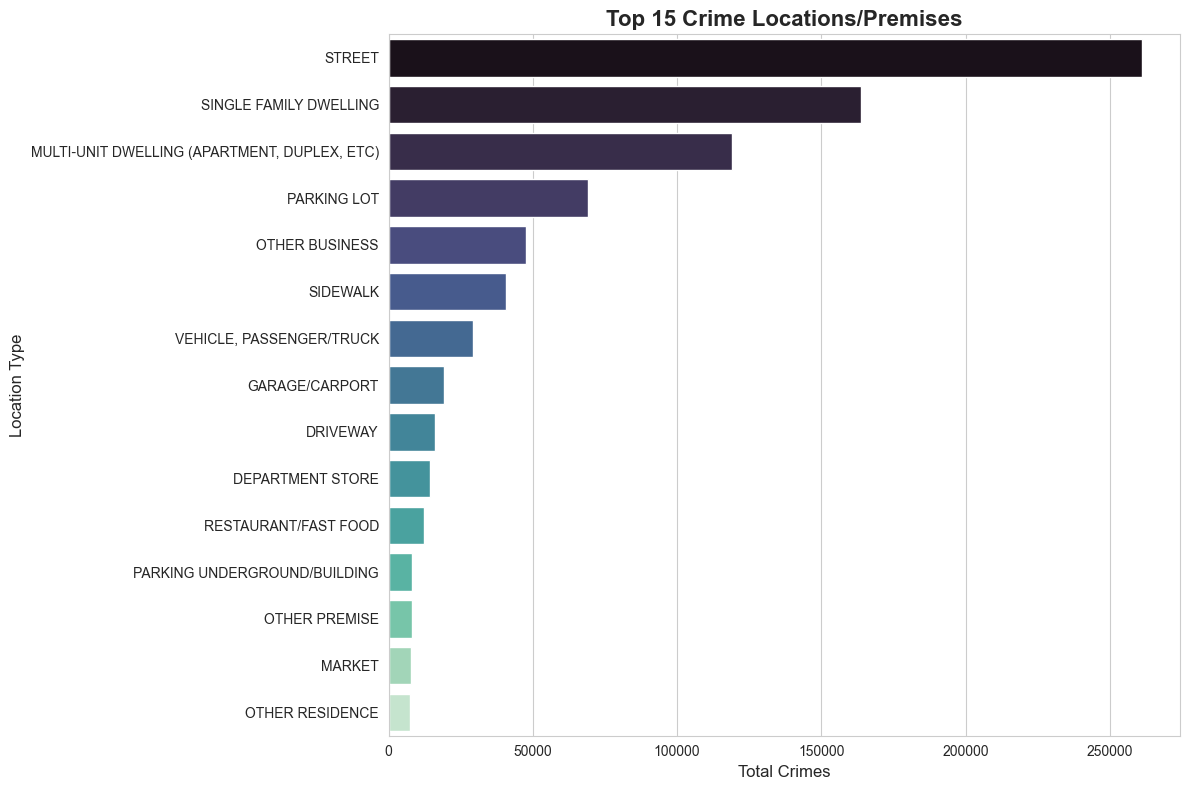

In [30]:
# VIZ 6: Top 15 Crime Locations
plt.figure(figsize=(12, 8))
top_premises = summary_premise.head(15)
sns.barplot(data=top_premises, y='Premis Desc', x='Total_Crimes', palette='mako')
plt.title('Top 15 Crime Locations/Premises', fontsize=16, fontweight='bold')
plt.xlabel('Total Crimes', fontsize=12)
plt.ylabel('Location Type', fontsize=12)
plt.tight_layout()
plt.savefig('6_Crime_Locations.png', dpi=300, bbox_inches='tight')
print("✅ Saved: 6_Crime_Locations.png")
plt.show()

✅ Saved: 7_Crime_Trend_Years.png


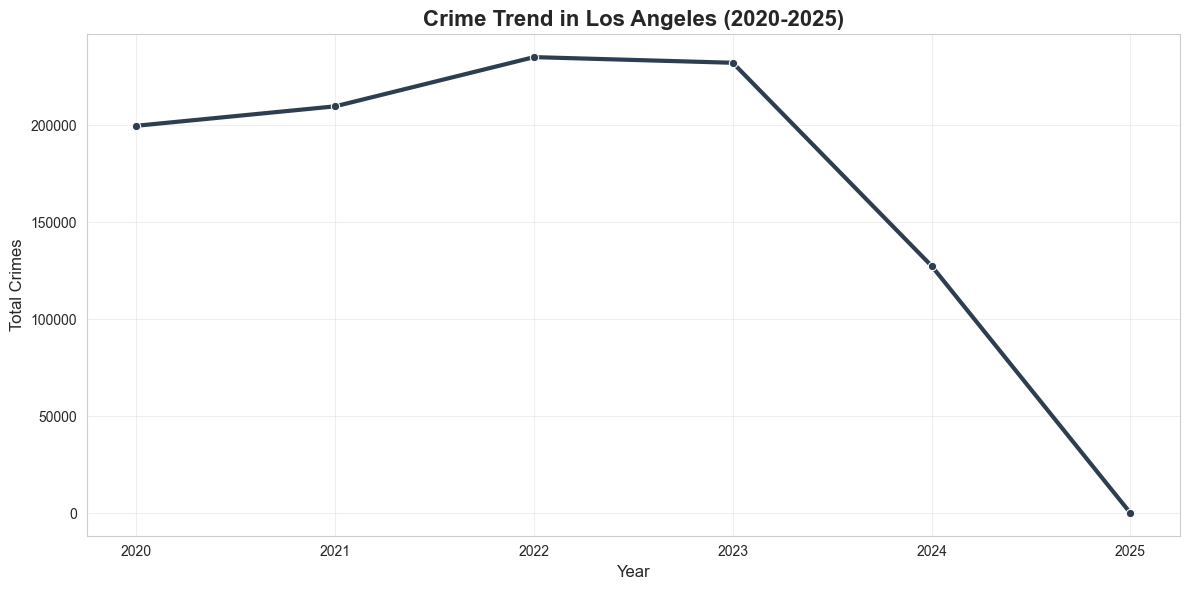

In [31]:
# VIZ 7: Crime Trend Over Years
yearly_trend = df.groupby('Year_OCC').size().reset_index(name='Total_Crimes')
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_trend, x='Year_OCC', y='Total_Crimes', marker='o', linewidth=3, color='#2c3e50')
plt.title('Crime Trend in Los Angeles (2020-2025)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Crimes', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('7_Crime_Trend_Years.png', dpi=300, bbox_inches='tight')
print("✅ Saved: 7_Crime_Trend_Years.png")
plt.show()

In [32]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Hour_OCC,Year_OCC,Month_OCC,DayOfWeek_OCC,Date_Only_OCC
0,211507896,2021-04-11,2020-11-07,NaT,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,NaN,7800 BEEMAN AV,NaN,34.2124,-118.4092,NaN,2020,November,Saturday,2020-11-07
1,201516622,2020-10-21,2020-10-18,NaT,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,NaN,ATOLL AV,N GAULT,34.1993,-118.4203,NaN,2020,October,Sunday,2020-10-18
2,240913563,2024-12-10,2020-10-30,NaT,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,NaN,14600 SYLVAN ST,NaN,34.1847,-118.4509,NaN,2020,October,Friday,2020-10-30
3,210704711,2020-12-24,2020-12-24,NaT,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,NaN,6000 COMEY AV,NaN,34.0339,-118.3747,NaN,2020,December,Thursday,2020-12-24
4,201418201,2020-10-03,2020-09-29,NaT,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,NaN,4700 LA VILLA MARINA,NaN,33.9813,-118.4350,NaN,2020,September,Tuesday,2020-09-29


In [33]:
#Fixing Time Format to get a clear Crime by Hour of Day Visualization

# Convert DATE OCC
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], errors='coerce')
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'], errors='coerce')

# Fix TIME OCC - it's in military time without colons (845, 1845, etc.)
def extract_hour_from_military(time_val):
    """
    Convert military time to hour
    Examples: 845 -> 8, 1845 -> 18, 1 -> 0, 2359 -> 23
    """
    try:
        if pd.isna(time_val):
            return np.nan
        
        # Convert to string and remove any decimals
        time_str = str(int(float(time_val))).zfill(4)  # Pad with zeros to make it 4 digits
        
        # Extract hour (first 2 digits)
        hour = int(time_str[:2])
        
        # Make sure it's valid (0-23)
        if 0 <= hour <= 23:
            return hour
        else:
            return np.nan
            
    except:
        return np.nan

df['Hour_OCC'] = df['TIME OCC'].apply(extract_hour_from_military)

# Extract date components
df['Year_OCC'] = df['DATE OCC'].dt.year
df['Month_OCC'] = df['DATE OCC'].dt.month_name()
df['DayOfWeek_OCC'] = df['DATE OCC'].dt.day_name()
df['Date_Only_OCC'] = df['DATE OCC'].dt.date

# Verify it worked
print(f"✅ Hour extraction successful!")
print(f"   Hour range: {df['Hour_OCC'].min()} to {df['Hour_OCC'].max()}")
print(f"   Valid hours: {df['Hour_OCC'].notna().sum():,} / {len(df):,}")
print(f"   Sample hours: {df['Hour_OCC'].dropna().head(10).tolist()}")

print("✅ Date/time processing complete")

✅ Hour extraction successful!
   Hour range: nan to nan
   Valid hours: 0 / 1,004,991
   Sample hours: []
✅ Date/time processing complete


✅ Saved: 2_Crime_By_Hour_Corrected.png


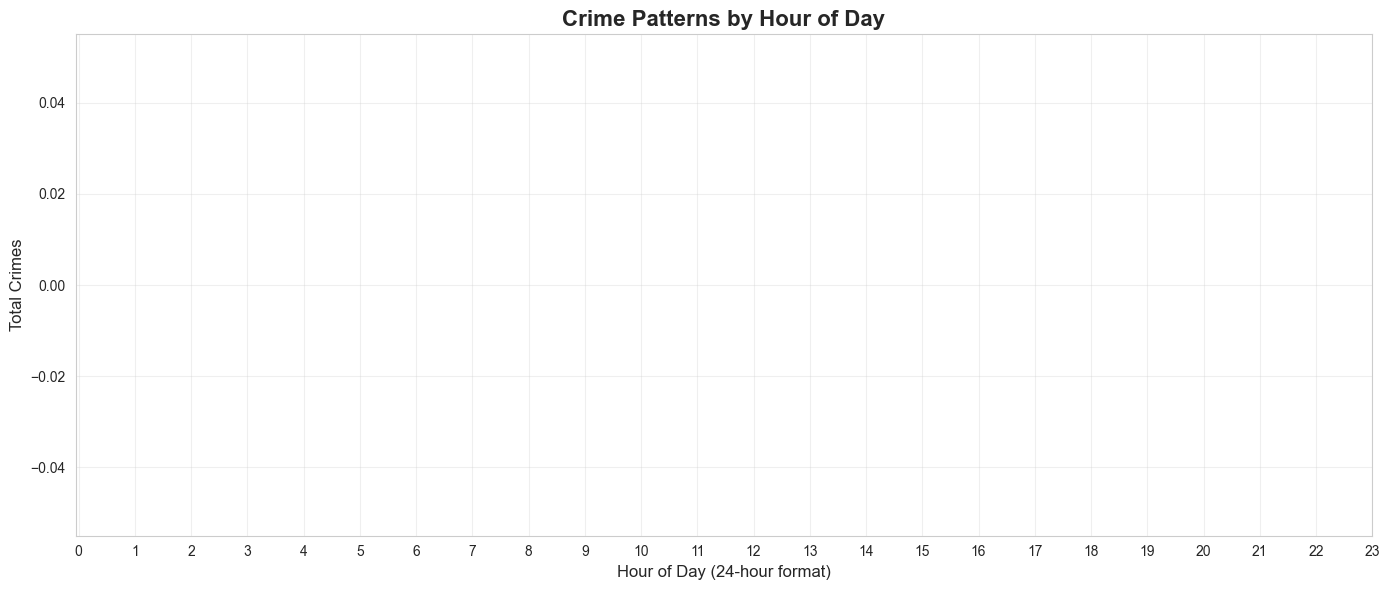

In [34]:
# VIZ 2: Crime by Hour of Day
plt.figure(figsize=(14, 6))
sns.lineplot(data=summary_hour, x='Hour_OCC', y='Total_Crimes', marker='o', linewidth=2.5, color='#e74c3c')
plt.title('Crime Patterns by Hour of Day', fontsize=16, fontweight='bold')
plt.xlabel('Hour of Day (24-hour format)', fontsize=12)
plt.ylabel('Total Crimes', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('2_Crime_By_Hour_Corrected.png', dpi=300, bbox_inches='tight')
print("✅ Saved: 2_Crime_By_Hour_Corrected.png")
plt.show()